In [5]:
import numpy as np
from scipy.constants import mu_0
from matplotlib import pyplot as plt
from forschungspraktikum.demo.jiles_atherton_for_demo import JilesAthertonH

# Der RK4-Algorithmus

Der sehr einfache eulersche Ansatz kann relativ leicht erweitert werden. Ein gängiger Algorithmus, der auf das Eulerverfahren aufbaut ist das klassische Runge-Kutta-Verfahren (RK4). Die Runge-Kutta-Verfahren sind eine Klasse von Integrationsalgorithmen, die für jeden Schritt eine bestimmte Anzahl von Zwischenschritten nutzen, um eine besser Näherung zu erzielen, als dies das Polygonzugverfahren vermag.

## Allgemeines Runge-Kutta-Verfahren

In einem $m$-stufigen Runge-Kutta-Verfahren werden $m$ Stützpunkte $k_i$ ermittelt, aus denen dann der tatsächliche Schritt errechnet wird. Die einzelnen Stützpunkte $k_i$ ergeben sich aus je einer Funktionsauswertung.
Um ein m-stufiges Runge-Kutta-Verfahren zu beschreiben benötigt man je m Gewichte $\alpha_i$, $\gamma_i$ sowie $m^2$ Gewichte $\beta_{i,j}$.

Für den nächsten Zeitschritt berechnet man

\begin{equation}
\begin{aligned}
	\text{Nächster Zeitpunkt} && t_n &= t_{n-1} + h \\
	\text{i-ter Hilfswert} && k_i &= f\left(y_{n-1} + h \sum_{j=1}^m \beta_{i,j}k_j, t_{n-1} + \alpha_i h\right) \\
	\text{Nächster Wert} && y_n &= y_{n-1} + h\sum_{i=1}^m y_i k_i
\end{aligned}
\end{equation}

Die Gewichte werden üblicherweise in einem sogenannten Butcher-Tableau dargestellt:

\begin{equation*}
	\begin{array}{c|ccc}
	\alpha_1 	& \beta_{1,1}   & \cdots & \beta_{1,m} \\
	\alpha_2 	& \beta_{2,1}   & \cdots & \beta_{2,m} \\
	\vdots      & \vdots        & \ddots & \vdots        \\
	\alpha_m    & \beta_{m,1}   & \cdots & \beta_{m,m} \\
	\hline
	            & \gamma_1      & \cdots & \gamma_m
\end{array}
\end{equation*}

Ist das Verfahren explizit, so lässt sich die Matrix $\beta_{i,j}$ als untere Dreiecksmatrix darstellen. Z.B. ist das klassische Runge-Kutta-Verfahren (RK4):

\begin{equation}
\renewcommand\arraystretch{1.2}
\begin{array}{c|cccc}
	0 &&&& \\
	\tfrac{1}{2} & \tfrac{1}{2} &&& \\
	\tfrac{1}{2} & 0 & \tfrac{1}{2} && \\
	1 & 0 & 0 & 1 &\\
	\hline
	& \tfrac{1}{6} & \tfrac{1}{3} & \tfrac{1}{3} & \tfrac{1}{6}
\end{array}
\end{equation}

Schreibt man die Definition aus, so erhält man für dieses

\begin{equation}
	\begin{aligned}
		t_n &= t_{n-1} + h \\[0.3cm]
		k_1 &= f\left(y_{n-1},\enspace t_{n-1}\right) \\
		k_2 &= f\left(y_{n-1} + hk_1/2,\enspace t_{n-1} + h/2\right) \\
		k_3 &= f\left(y_{n-1} + hk_2/2,\enspace t_{n-1} + h/2\right) \\
		k_4 &= f\left(y_{n-1} + hk_3,\enspace t_{n-1} + h\right) \\[0.3cm]
		y_n &= y_{n-1} + \tfrac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)
	\end{aligned}
\end{equation}

Dieses Verfahren soll im Folgenden nun auf das Jiles-Atherton-Modell angewendet werden.

## Anwendung des RK4-Algorithmus auf das Jiles-Atherton-Modell

Wieder ist die Ausgangsgleichung

\begin{equation}
    \frac{dM}{dH} = f_{JA}\left(M, H, \frac{dH}{dt}, p\right) \quad \Rightarrow \quad \frac{dM}{dt} = f_{JA}\left(M, H(t), \frac{dH}{dt}, p\right) \frac{dH(t)}{dt}
\end{equation}

Die (sehr kleine) Schwierigkeit hierbei ist, dass t nun mit halber Schrittweite wandert -- für das anregende Feld H benötigen wir nun doppelt so viele Datenpunkte. (Ein alternativer Ansatz wäre, die anregende Funktion direkt im Integrationsalgorithmus einzubauen -- da später aber Messdaten angepasst werden soll, muss auch die Anregung als Zeitreihe dargestellt werden.)
Um dies zu lösen wird für die Anregung ein Index mit doppelt so kleiner Schrittweite verwendet. Der Punkt der Magnetisierung $M_i$ gehört also zum Punkt der Anregung $H_{2i}$.

\begin{align}
    t_n &= t_{n-1} + h \\[0.5cm]
    k_1 &= f_{JA}\left(M_{n-1}, H_{2n-2}, \left(\frac{dH}{dt}\right)_{2n-2}, p\right)\left(\frac{dH}{dt}\right)_{2n-2} \\[0.3cm]
    k_2 &= f_{JA}\left(M_{n-1} + h k_1/2, H_{2n-1}, \left(\frac{dH}{dt}\right)_{2n-1} , p\right)\left(\frac{dH}{dt}\right)_{2n-1} \\[0.3cm]
    k_3 &= f_{JA}\left(M_{n-1} + h k_2/2, H_{2n-1}, \left(\frac{dH}{dt}\right)_{2n-1}, p\right)\left(\frac{dH}{dt}\right)_{2n-1} \\[0.3cm]
    k_4 &= f_{JA}\left(M_{n-1} + h k_3, H_{2n}, \left(\frac{dH}{dt}\right)_{2n}, p\right)\left(\frac{dH}{dt}\right)_{2n} \\[0.5cm]
    M_n &= M_{n-1} + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align}

Dis wird nun mit den Parametern aus dem [Modell mit dem expliziten Eulerverfahren](explicit-euler.ipynb) implementiert.

In [14]:
r = 2.0e-2 # m, Radius
i_hat = 20.0 # A, Strom
f = 1.0 # Hz, Frequenz
n = 5 # Anzahl Perioden
n_p = 1000# Datenpunkte pro Periode

t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.cos(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.0021
a = 110.5
k = 300.0
c = 0.4
Msat = 1.35e5

# Parametervektor
p = {'alpha': alpha,
     'a': a,
     'k': k,
     'c': c,
     'm_sat': Msat}

In [15]:
# Magnetisierung initialisieren, doppelt so große Schrittweite wie Feldvorgabe H!
M = np.zeros(int(np.size(H)/2))

# Zur Vereinfachung: dH/dt als Vektor aufstellen
dHdt = np.zeros(np.size(H))
dHdt[1:] = (H[1:] - H[0:-1])/(t[1] - t[0])
assert(dHdt[1] == (H[1] - H[0])/(t[1] - t[0]))

# Zur Notation: JilesAthertonH -> JA
JA = JilesAthertonH

In [16]:
# Iteration

for n in range(2, len(M)):
    h = t[2*n] - t[2*n-2]
    k1 = JA(M[n-1], H[2*n-2], dHdt[2*n-2], p)*dHdt[2*n-2]
    k2 = JA(M[n-1] + h*k1/2.0, H[2*n-1], dHdt[2*n-1], p)*dHdt[2*n-1]
    k3 = JA(M[n-1] + h*k2/2.0, H[2*n-1], dHdt[2*n-1], p)*dHdt[2*n-1]
    k4 = JA(M[n-1] + h*k3, H[2*n], dHdt[2*n], p)*dHdt[2*n]
    M[n] = M[n-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)

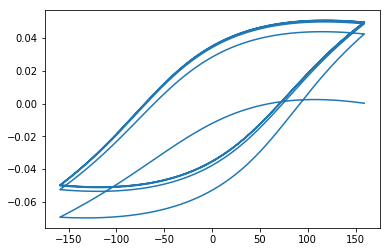

In [17]:
# Um die Werte plotten zu können, muss H wieder "ausgedünnt werden"

H_ = H[::2]
B = mu_0*(H_ + M)
plt.plot(H_, B)